<a href="https://colab.research.google.com/github/Nhan-beo123/YOLOh/blob/main/b%C3%A0i_t%E1%BA%ADp_v%E1%BB%81_nh%C3%A0_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [27]:
import os
import cv2
import albumentations as A
import shutil

# Thư mục gốc chứa ảnh và label
img_dir = '/content/drive/MyDrive/canteen_menu/yolo_data/train/images'
label_dir = '/content/drive/MyDrive/canteen_menu/yolo_data/train/labels'
save_img_dir = '/content/images_aug/train'
save_lbl_dir = '/content/labels_aug/train'

os.makedirs(save_img_dir, exist_ok=True)
os.makedirs(save_lbl_dir, exist_ok=True)

# Augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=15, p=0.5),
    A.RandomScale(scale_limit=0.1, p=0.5),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

for img_file in os.listdir(img_dir):
    if not img_file.endswith('.jpg'): continue
    img_path = os.path.join(img_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace('.jpg', '.txt'))

    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # Load labels
    with open(label_path, 'r') as f:
        lines = f.read().strip().split('\n')
    boxes = []
    class_labels = []
    for line in lines:
        cls, x, y, bw, bh = map(float, line.split())
        boxes.append([x, y, bw, bh])
        class_labels.append(int(cls))

    for i in range(5):  # tăng số ảnh mỗi ảnh gốc lên 5
        augmented = transform(image=img, bboxes=boxes, class_labels=class_labels)
        aug_img = augmented['image']
        aug_boxes = augmented['bboxes']
        aug_labels = augmented['class_labels']

        # Save augmented image
        new_img_name = img_file.replace('.jpg', f'_aug{i}.jpg')
        new_lbl_name = img_file.replace('.jpg', f'_aug{i}.txt')
        cv2.imwrite(os.path.join(save_img_dir, new_img_name), aug_img)

        # Save new labels
        with open(os.path.join(save_lbl_dir, new_lbl_name), 'w') as f:
            for cls, box in zip(aug_labels, aug_boxes):
                f.write(f"{cls} {' '.join(f'{b:.6f}' for b in box)}\n")


In [28]:
!mkdir -p images/train_all labels/train_all

In [30]:
!cp -r /content/drive/MyDrive/canteen_menu/yolo_data/train/images/* /content/images/train_all/
!cp -r /content/images_aug/* /content/images/train_all/
!cp -r /content/drive/MyDrive/canteen_menu/yolo_data/train/labels/* /content/labels/train_all/
!cp -r /content/labels_aug/* /content/labels/train_all/


In [29]:
# Tạo các thư mục đích nếu chưa tồn tại
!mkdir -p /content/images/train_all
!mkdir -p /content/labels/train_all


In [31]:
!python train.py --img 640 --batch 16 --epochs 100 --data /content/drive/MyDrive/canteen_menu/yolo_data/data.yaml --weights yolov5s.pt --name new_train_aug


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-05 04:50:05.599014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746420605.631806   16185 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746420605.638495   16185 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose "Don't visualize my results"
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/canteen_menu

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-5-5 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7047883 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 743x1062 1 cá kho, 3 cơms
Speed: 223.3ms pre-process, 752.2ms inference, 2.7ms NMS per image at shape (1, 3, 448, 640)


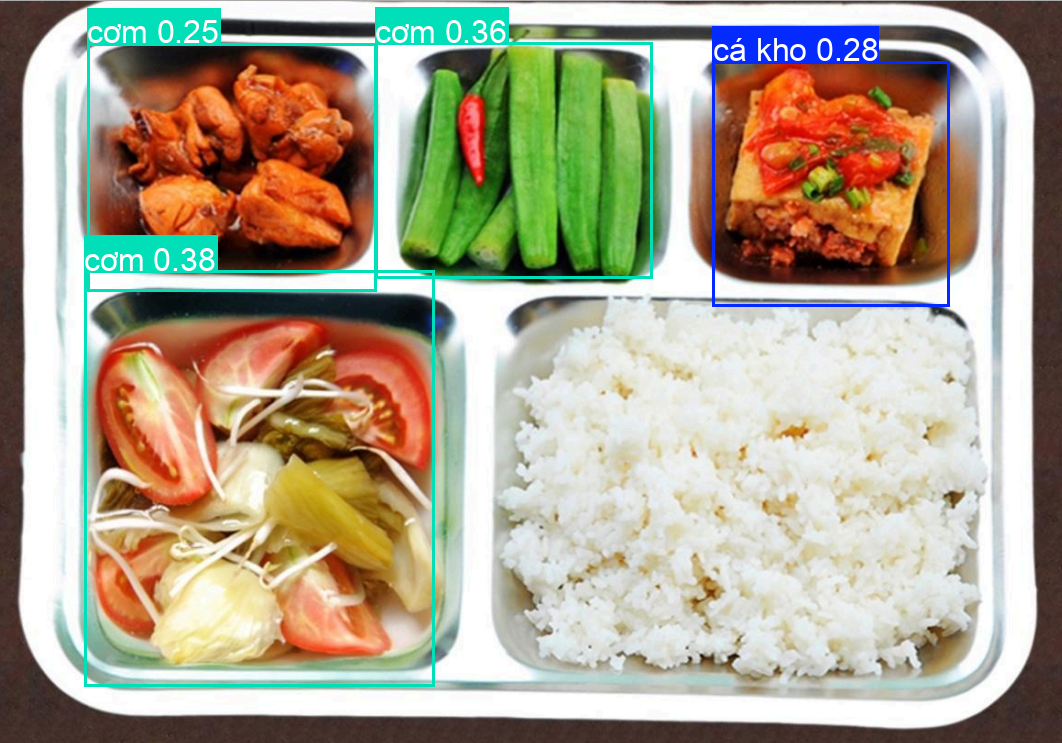

Saved 1 image to runs/detect/exp7
Saved results to runs/detect/exp7

Saved 1 image to runs/detect/exp8
Saved results to runs/detect/exp8



[{'box': [tensor(87.26786),
   tensor(43.38156),
   tensor(376.53595),
   tensor(291.19061)],
  'conf': tensor(0.25061),
  'cls': tensor(3.),
  'label': 'cơm 0.25',
  'im': array([[[245, 240, 240],
          [221, 216, 216],
          [193, 186, 188],
          ...,
          [ 55,  51,  51],
          [ 51,  51,  51],
          [ 55,  51,  51]],
  
         [[221, 211, 212],
          [188, 178, 181],
          [158, 148, 150],
          ...,
          [104, 104, 104],
          [104, 104, 104],
          [103, 104, 104]],
  
         [[195, 184, 184],
          [163, 153, 153],
          [136, 127, 127],
          ...,
          [176, 177, 177],
          [176, 177, 177],
          [176, 178, 178]],
  
         ...,
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [ 74,  69,  54],
          [ 73,  68,  53],
          [ 74,  69,  54]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
       

In [33]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/yolov5/runs/train/new_train_aug2/weights/last.pt')
model.conf = 0.25  # Tăng ngưỡng
model.iou = 0.45   # Đặt lại IoU mặc định

img_path = '/content/drive/MyDrive/canteen_menu/yolo_data/train/images/khay7.png'
results = model(img_path)
results.print()
results.show()
results.crop(save=True)
results.crop(save=True)

In [37]:
# Import thư viện
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Khởi tạo ImageDataGenerator
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True
)

# Dữ liệu training
train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/canteen_menu/data/classification_dataset',
    target_size=(96, 96),  # MobileNetV2 tối thiểu là 96x96
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Dữ liệu validation
val_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/canteen_menu/data/classification_dataset',
    target_size=(96, 96),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load base MobileNetV2 (không có top layers)
base_model = MobileNetV2(include_top=False, input_shape=(96, 96, 3), weights='imagenet')
base_model.trainable = False  # Freeze model gốc

# Thêm các tầng phía trên
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks (tuỳ chọn)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Huấn luyện
model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, reduce_lr]
)


Found 476 images belonging to 14 classes.
Found 113 images belonging to 14 classes.
Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 610ms/step - accuracy: 0.1376 - loss: 2.9899 - val_accuracy: 0.4159 - val_loss: 1.7900 - learning_rate: 0.0010
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.4661 - loss: 1.6054 - val_accuracy: 0.6637 - val_loss: 1.2153 - learning_rate: 0.0010
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 478ms/step - accuracy: 0.6846 - loss: 0.9755 - val_accuracy: 0.7434 - val_loss: 0.9764 - learning_rate: 0.0010
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.7697 - loss: 0.7087 - val_accuracy: 0.7168 - val_loss: 0.8790 - learning_rate: 0.0010
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 493ms/step - accuracy: 0.7992 - loss: 0.6409 - val_accuracy: 0.7434 - val_loss: 0.8301 - learning_rate: 0.0010
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 433ms/step - accuracy: 0.8727 - loss: 0.4792 - val_accuracy: 0.8142 - val_loss: 0.7021 - learning_rate: 0.0010
Epo

In [38]:
model.save('/content/CNN_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


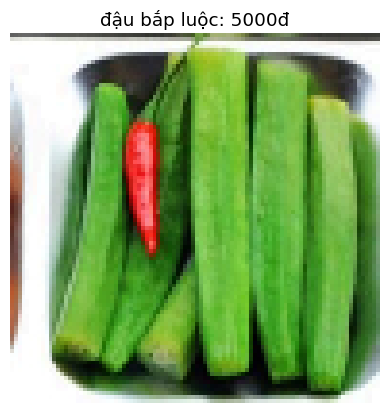

đậu bắp luộc: 5000đ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


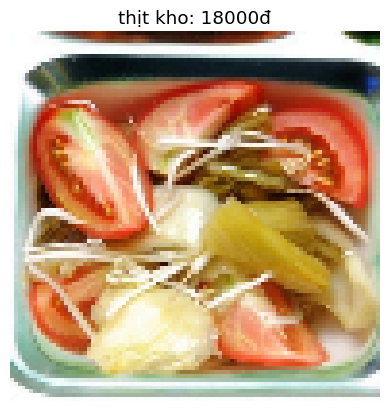

thịt kho: 18000đ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


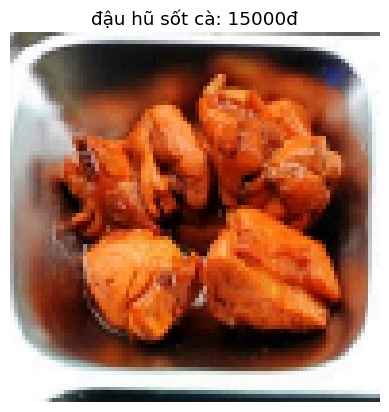

đậu hũ sốt cà: 15000đ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


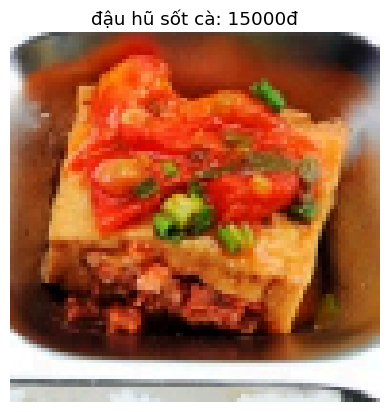

đậu hũ sốt cà: 15000đ

>> Tổng hóa đơn: 53000đ


In [52]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Tải mô hình đã huấn luyện
from tensorflow.keras.models import model_from_json
model = load_model('/content/CNN_model.h5')  # Hoặc load model từ JSON nếu bạn chỉ lưu weights

# Đọc file giá tiền từ .txt và lưu vào dictionary
prices = {}
with open('/content/drive/MyDrive/canteen_menu/menu.txt', 'r', encoding='utf-8') as f:
    for line in f:
        if ':' in line:
            dish, price = line.split(':')
            dish = dish.strip().strip('"')
            price = price.strip().replace(',', '')
            prices[dish] = int(price)

# Giả sử bạn có danh sách tên lớp đúng thứ tự
# Nếu không, hãy lưu lại class_indices lúc huấn luyện và load lại tại đây
labels = sorted(prices.keys())  # Cẩn thận nếu nhãn trong model không trùng hoàn toàn với menu

# Duyệt ảnh trong thư mục crops
total = 0
img_dir = '/content/yolov5/runs/detect/exp7/crops'
for class_dir in os.listdir(img_dir):
    class_path = os.path.join(img_dir, class_dir)
    if not os.path.isdir(class_path):
        continue
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)

        # Load và chuẩn hóa ảnh
        img = image.load_img(img_path, target_size=(96, 96))  # Kích thước phải trùng lúc huấn luyện
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) / 255.

        # Dự đoán
        pred = model.predict(x)
        label = labels[np.argmax(pred)]
        price = prices.get(label, 0)

        # Hiển thị ảnh với nhãn và giá
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{label}: {price}đ')
        plt.show()
        print(f'{label}: {price}đ')
        total += price

print(f'\n>> Tổng hóa đơn: {total}đ')
